# Магические атрибуты вызываемых объектов

Здесь и далее использованы материалы: https://github.com/alexopryshko/advancedpython/

В первую очередь, это, конечно, метод `__call__`:

In [1]:
def foo(a, b=5, *args, **kwargs):
    """Здесь можем написать документацию для функции"""
    print("Функция вызвана с параметрами:")
    print("a =", a)
    print("b =", b)
    for i, arg in enumerate(args):
        print(f"arg[{i}] =", arg)
    else:
        print("Без args")
    print("kwargs:", kwargs)
    
foo.__call__(35)
print()
foo(35)

Функция вызвана с параметрами:
a = 35
b = 5
Без args
kwargs: {}

Функция вызвана с параметрами:
a = 35
b = 5
Без args
kwargs: {}


In [2]:
foo.__call__.__call__.__call__.__call__.__call__(46)

Функция вызвана с параметрами:
a = 46
b = 5
Без args
kwargs: {}


## Поля вызываемых объектов

Информация о докстринге, названии функции и модуле:

- `__name__` - имя функции
- `__qualname__` - полное имя функции
- `__doc__` - docstring
- `__module__` - имя модуля, в котором определена функция

In [3]:
print(foo.__name__)
print(foo.__qualname__)
print(foo.__doc__)
print(foo.__module__)

foo
foo
Здесь можем написать документацию для функции
__main__


In [4]:
def wrapper():
    def inner_foo():
        pass
    return inner_foo

wrapper().__qualname__

'wrapper.<locals>.inner_foo'

Информация о внутренностях функции: аргументы по умолчанию, глобальные переменные, видимые функции, код.

- `__dict__` - атрибуты объекта-функции
- `__defaults__` - кортеж значений по умолчанию
- `__code__` - специальный объект code с кодом функции
- `__globals__` - глобальные переменные, доступные функции

In [5]:
print(foo.__dict__)
foo.field = "hi"
print(foo.__dict__)

{}
{'field': 'hi'}


In [6]:
print(foo.__defaults__, end='\n\n')
print(foo.__code__, end='\n\n')
print(foo.__globals__, end='\n\n')

(5,)

<code object foo at 0x7fcf30326660, file "<ipython-input-1-2282872ae5a3>", line 1>

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'def foo(a, b=5, *args, **kwargs):\n    """Здесь можем написать документацию для функции"""\n    print("Функция вызвана с параметрами:")\n    print("a =", a)\n    print("b =", b)\n    for i, arg in enumerate(args):\n        print(f"arg[{i}] =", arg)\n    else:\n        print("Без args")\n    print("kwargs:", kwargs)\n    \nfoo.__call__(35)\nprint()\nfoo(35)', 'foo.__call__.__call__.__call__.__call__.__call__(46)', 'print(foo.__name__)\nprint(foo.__qualname__)\nprint(foo.__doc__)\nprint(foo.__module__)', 'def wrapper():\n    def inner_foo():\n        pass\n    return inner_foo\n\nwrapper().__qualname__', 'print(foo.__dict__)\nfoo.fie

Сигнатуру вызываемых объектов можно указывать еще парой способов. Например, аргументы, которые идут после отдельно стоящей `*`, обязательно должны быть именоваными при вызове функции. Также, начиная с Python 3.6, можно указывать аннотации типов аргументов и возвращаемого значения. Ещё пара магических атрибутов:

- `__kwdefaults__` - словарь значений по умолчанию обязательно именованных аргументов
- `__annotations__` - словарь с аннотациями аргументов и результата функции

In [8]:
def bar(*, a: str = 1, b: str = "abc") -> None:
    pass

print(bar.__kwdefaults__)
print(bar.__annotations__)
print(foo.__annotations__)

{'a': 1, 'b': 'abc'}
{'a': <class 'str'>, 'b': <class 'str'>, 'return': None}
{}


### Замыкания

__Замыкание__ (closure) в программировании — это функция, в теле которой присутствуют ссылки на переменные, объявленные вне тела этой функции в окружающем коде и не являющиеся ее параметрами.

В следующем примере из внутренней функции мы обращаемся к переменным, объявленным во внешней. При этом даже после удаления внешней функции значения используемых переменных останутся сохраненными для внутренней функции. Доступ к этим значениям можно получить через поле `__closure__`.

In [9]:
def outer():
    g = 5
    b = 4
    def inner():
        print(g, b)
    return inner
    
f = outer()
del outer
f()
print("Closures contents:", [cell.cell_contents for cell in f.__closure__])

5 4
Closures contents: [4, 5]


# Магические поля методов классов

- `__self__` - объект класса
- `__func__` - объект функции метода, объявленного в классе

In [12]:
class A:
    "A class"
    
    some_field = 25
    
    def func(self):
        print("method")
        
a = A()
print(a.func.__self__ is a)
a.func.__func__(a)

True
method


In [ ]:
a.func.__func__ is A.func

# Магические поля классов

- `__name__` - имя класса
- `__module__` - модуль, в котором объявлен класс
- `__qualname__` - fully qualified имя
- `__doc__` - докстринг
- `__dict__` - namespace класса

In [13]:
from pprint import pprint

print("name:", A.__name__)
print("qualname:", A.__qualname__)
print("module:", A.__module__)
print("doc:", A.__doc__)
pprint(A.__dict__)

name: A
qualname: A
module: __main__
doc: A class
mappingproxy({'__dict__': <attribute '__dict__' of 'A' objects>,
              '__doc__': 'A class',
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'A' objects>,
              'func': <function A.func at 0x7fcf3031b9d0>,
              'some_field': 25})


## Магические поля, содержащие информацию о наследовании

- `__bases__` - базовые классы
- `__base__` - базовый класс, который указан первым по
порядку
- `__mro__` - список классов, упорядоченный по вызову
super функции

In [14]:
class A:
    pass


class B(A):
    pass


class C:
    pass


class D(B, C):
    pass


print(D.__base__)
print(D.__bases__)
print(D.__mro__)

<class '__main__.B'>
(<class '__main__.B'>, <class '__main__.C'>)
(<class '__main__.D'>, <class '__main__.B'>, <class '__main__.A'>, <class '__main__.C'>, <class 'object'>)


## Поля \_\_dict\_\_ и \_\_slots\_\_

https://otus.ru/nest/post/664/

В обычном случае для хранения атрибутов объекта используется словарь `.__dict__`. Посмотрим, как в нём появляются объекты. При этом нужно понимать, что класс - это объект типа type, и поэтому у класса тоже есть свой \_\_dict\_\_

In [15]:
class A:
    a_class = 'a_class'

    def __init__(self):
        self.a = 'a'


class B(A):
    b_class = 'b_class'

    def __init__(self):
        self.b = 'b'
        super().__init__()


a = A()
b = B()

print('a.__dict__', a.__dict__)
print('A.__dict__', A.__dict__)
print()
print('b.__dict__', b.__dict__)
print('B.__dict__', B.__dict__)

a.__dict__ {'a': 'a'}
A.__dict__ {'__module__': '__main__', 'a_class': 'a_class', '__init__': <function A.__init__ at 0x7fcf3031b940>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None}

b.__dict__ {'b': 'b', 'a': 'a'}
B.__dict__ {'__module__': '__main__', 'b_class': 'b_class', '__init__': <function B.__init__ at 0x7fcf3031b040>, '__doc__': None}


Наследование работает:

In [16]:
print('b.a_class', b.a_class)
print('b.b', b.b)

b.a_class a_class
b.b b


Попробуем изменить значения полей объектов:

In [17]:
b1 = B()
b1.a = 1
b.a = 2
b.b_class = 1
print('b.__dict__', b.__dict__)
print('b1.__dict__', b1.__dict__)
print('A.__dict__', A.__dict__)
print('B.__dict__', B.__dict__)

b.__dict__ {'b': 'b', 'a': 2, 'b_class': 1}
b1.__dict__ {'b': 'b', 'a': 1}
A.__dict__ {'__module__': '__main__', 'a_class': 'a_class', '__init__': <function A.__init__ at 0x7fcf3031b940>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None}
B.__dict__ {'__module__': '__main__', 'b_class': 'b_class', '__init__': <function B.__init__ at 0x7fcf3031b040>, '__doc__': None}


И значения полей классов:

In [18]:
B.a_class = 'new_a_class'
print('b.a_class', b.a_class)
print('b1.a_class', b1.a_class)
print('a.a_class', a.a_class)
print('A.__dict__', A.__dict__)
print('B.__dict__', B.__dict__)
print()

A.a_class = 'new_new_a_class'
print('b.a_class', b.a_class)
a1 = A()
print('a.a_class', a.a_class)
print('a1.a_class', a1.a_class)
print('A.__dict__', A.__dict__)

b.a_class new_a_class
b1.a_class new_a_class
a.a_class a_class
A.__dict__ {'__module__': '__main__', 'a_class': 'a_class', '__init__': <function A.__init__ at 0x7fcf3031b940>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None}
B.__dict__ {'__module__': '__main__', 'b_class': 'b_class', '__init__': <function B.__init__ at 0x7fcf3031b040>, '__doc__': None, 'a_class': 'new_a_class'}

b.a_class new_a_class
a.a_class new_new_a_class
a1.a_class new_new_a_class
A.__dict__ {'__module__': '__main__', 'a_class': 'new_new_a_class', '__init__': <function A.__init__ at 0x7fcf3031b940>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None}


Поскольку Python - динамически типизированный язык и, к тому же, добавлять атрибуты объектам классов можно на лету, хранение атрибутов занимает достаточно много памяти: нужно хранить словарь атрибутов и все его элементы отдельно и с запасом памяти для новых атрибутов. Для того, чтобы минимизировать память, мы можем "зафиксировать" атрибуты класса. Для этого используется магическое поле `__slots__`. При этом пропадают поля `__dict__` и `__weakref__`. Давайте сравним поведение обычного класса и класса с полем `__slots__`

In [19]:
class RegularClass:
    pass


obj = RegularClass()
obj.foo = 5
print("foo:", obj.foo)

obj.another_attr = "one more attr"
print(obj.another_attr)
obj.__dict__

foo: 5
one more attr


{'foo': 5, 'another_attr': 'one more attr'}

In [20]:
class SlotsClass:
    __slots__ = ('foo', 'bar')
    

obj = SlotsClass()
obj.foo = 5
print(obj.foo)

obj.another_attr = "one more attr in slots class"

5


AttributeError: 'SlotsClass' object has no attribute 'another_attr'

In [21]:
obj.__dict__

AttributeError: 'SlotsClass' object has no attribute '__dict__'

### Производительность \_\_slots\_\_

Напишем небольшой тест:

In [22]:
class Slots(object):
    __slots__ = ('foo',)

    
class NoSlots(object):
    pass


def get_set_delete(obj):
    obj.foo = 'foo'
    obj.foo
    del obj.foo


def test_slots():
    get_set_delete(Slots()) 

def test_noslots():
    get_set_delete(NoSlots())

Посмотрим на затрачиваемое время средствами Jupyter:

In [23]:
%%timeit
test_noslots()

279 ns ± 8.29 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [24]:
%%timeit
test_slots()

231 ns ± 4.34 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


И средствами библиотеки timeit:

In [25]:
import timeit
print("noslots:", min(timeit.repeat(test_noslots)))
print("slots:", min(timeit.repeat(test_slots)))

noslots: 0.26050991699958104
slots: 0.2235034999976051


#### Сравнение затрат по памяти

https://stackoverflow.com/questions/472000/usage-of-slots

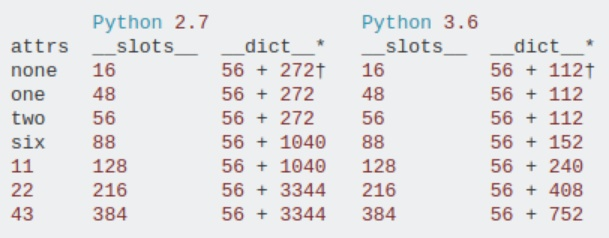

### Нюансы наследования

Поле `__slots__` наследуется, но класс-наследник по умолчанию всё равно получает поле `__dict__`, т.е. является динамически изменяемым.

In [26]:
class SlotsClass:
    __slots__ = ('foo', 'bar')

    
class ChildSlotsClass(SlotsClass):
    pass


obj = ChildSlotsClass()
print("slots of child:", obj.__slots__)

obj.foo = 5
obj.something_new = 3
print("__dict__ есть, и он не пустой:", obj.__dict__)

slots of child: ('foo', 'bar')
__dict__ есть, и он не пустой: {'something_new': 3}


Если нужно, чтобы объект класса-наследника не был динамически изменяемым, нужно отдельно в нём прописать `__slots__`. При этом дублировать слоты родительского класса не нужно.

In [27]:
class ChildSlotsClass(SlotsClass):
    __slots__ = ('baz',)
    
    
obj = ChildSlotsClass()
obj.foo = 5
obj.baz = 6
print("foo & baz:", obj.foo, obj.baz)
obj.sth_else = "fail"

foo & baz: 5 6


AttributeError: 'ChildSlotsClass' object has no attribute 'sth_else'

А вот множественное наследование работать не будет.

In [28]:
class BaseA(object): 
    __slots__ = ('a',)

    
class BaseB(object): 
    __slots__ = ('b',)
    
    
class Child(BaseA, BaseB):
    pass

TypeError: multiple bases have instance lay-out conflict